## IMPOR DATA

In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


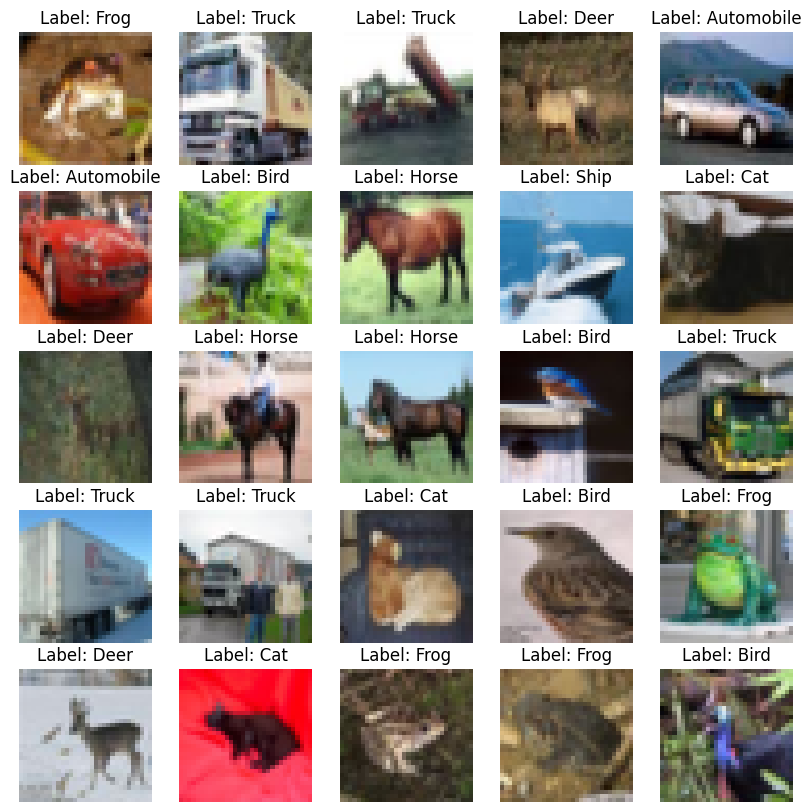

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


In [6]:
import matplotlib.pyplot as plt

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])  # Show the image
    
    if len(y_train[i]) > 1:  
        label_index = y_train[i].argmax()  
    else:
        label_index = y_train[i][0]
    
    plt.title(f"Label: {class_names[label_index]}")  # Show class name
    plt.axis('off')

plt.show()

# Print class names
print(class_names)


## SHARPENING IMAGES

In [3]:
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Image sharpening function
def sharpen_image(image):
    # Create the sharpening kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    # Apply the sharpening kernel to the image
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

# Function to sharpen all images
def sharpen_images(images):
    sharpened_images = []
    for img in images:
        sharpened_img = sharpen_image(img)
        sharpened_images.append(sharpened_img)
    return np.array(sharpened_images)


In [4]:
x_train_sharpened = sharpen_images(x_train)
x_test_sharpened = sharpen_images(x_test)

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize original and sharpened images
def visualize_sharpening(original_images, sharpened_images, n_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(n_images):
        # Original image
        plt.subplot(2, n_images, i + 1)
        plt.imshow(original_images[i])
        plt.title('Original')
        plt.axis('off')

        # Sharpened image
        plt.subplot(2, n_images, n_images + i + 1)
        plt.imshow(sharpened_images[i])
        plt.title('Sharpened')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize the first 5 images from both the original and sharpened datasets
visualize_sharpening(x_train, x_train_sharpened, n_images=5)


## DEEP LEARNING

### PREPROCESSING

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [10]:
# Reshape the target labels to 1D
y_train_flatten = y_train.flatten()
y_test_flatten = y_test.flatten()

In [14]:
x_train_normalized = x_train_sharpened.astype('float32') / 255.0
x_test_normalized = x_test_sharpened.astype('float32') / 255.0

# Convert class labels to one-hot encoded format
y_train_onehot = to_categorical(y_train_flatten, 10)
y_test_onehot = to_categorical(y_test_flatten, 10)

### MODELLING (CNN)

In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import models, layers

# Define the improved CNN model with Batch Normalization and Dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and fully connected layers with Dropout
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer added
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 621,258 (2.37 MB)

 Trainable params: 620,810 (2.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:

# Define a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model without data augmentation
history = model.fit(x_train_normalized, y_train_onehot, epochs=20, batch_size=64, 
                    validation_data=(x_test_normalized, y_test_onehot), 
                    callbacks=[lr_scheduler])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_normalized, y_test_onehot, verbose=2)
print(f"Test Accuracy : {test_acc * 100:.2f}%")

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - accuracy: 0.4152 - loss: 1.7342 - val_accuracy: 0.6049 - val_loss: 1.1037 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.6323 - loss: 1.0380 - val_accuracy: 0.6350 - val_loss: 1.0721 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 68ms/step - accuracy: 0.7019 - loss: 0.8561 - val_accuracy: 0.7353 - val_loss: 0.7558 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.7401 - loss: 0.7459 - val_accuracy: 0.7454 - val_loss: 0.7465 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.7747 - loss: 0.6481 - val_accuracy: 0.7020 - val_loss: 0.8897 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.7993 - loss: 0.5785 - val_accuracy: 0.7415 - val_loss: 0.7429 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.8223 - l

In [17]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Get predictions for the test set
y_pred = model.predict(x_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [28]:
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[833   9  39  18   8   1   7  11  52  22]
 [ 14 907   1   3   0   6   3   1  11  54]
 [ 51   1 706  58  64  40  45  26   7   2]
 [ 17   5  59 638  43 145  46  28   8  11]
 [ 12   2  44  48 794  19  31  44   5   1]
 [  9   0  29 153  40 709  14  39   2   5]
 [  6   3  35  50  17  18 859   5   6   1]
 [ 13   1  15  31  42  40   9 844   0   5]
 [ 48  14   7   7   0   4   3   4 899  14]
 [ 22  66   5   8   5   2   1   7  12 872]]


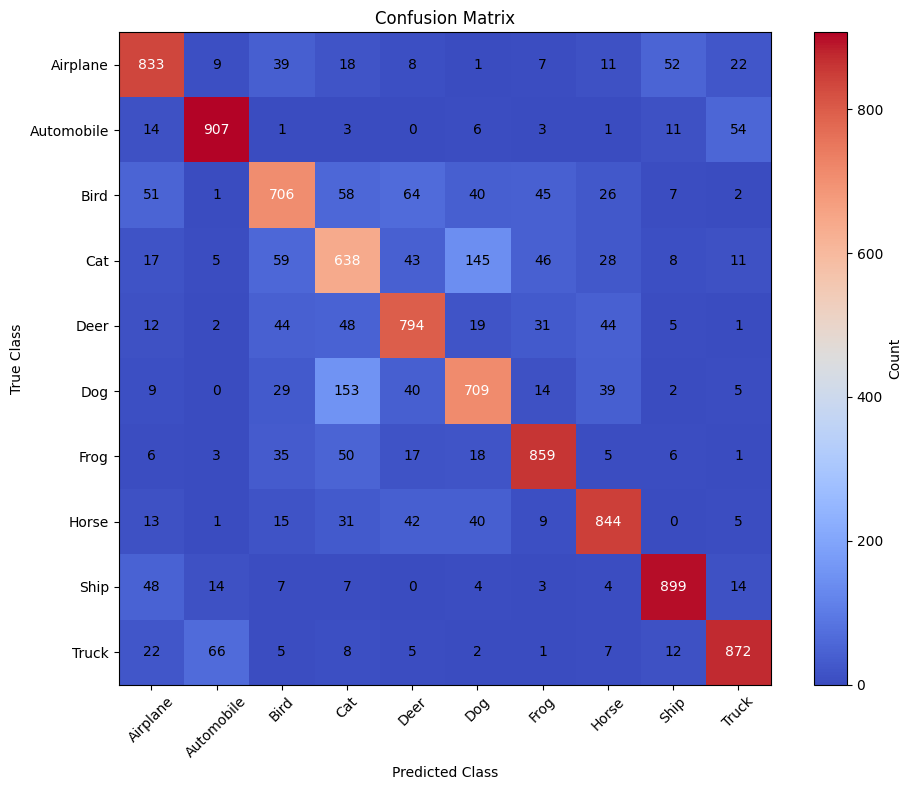

In [40]:
# Plot confusion matrix using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap='coolwarm')  # Use a contrasting colormap
plt.title('Confusion Matrix')
plt.colorbar(label='Count')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add annotations for each cell in the matrix
thresh = conf_matrix.max() / 2.  # Threshold for color selection
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             ha="center", va="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.tight_layout()
plt.show()

In [41]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    Airplane       0.81      0.83      0.82      1000
  Automobile       0.90      0.91      0.90      1000
        Bird       0.75      0.71      0.73      1000
         Cat       0.63      0.64      0.63      1000
        Deer       0.78      0.79      0.79      1000
         Dog       0.72      0.71      0.71      1000
        Frog       0.84      0.86      0.85      1000
       Horse       0.84      0.84      0.84      1000
        Ship       0.90      0.90      0.90      1000
       Truck       0.88      0.87      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



## MACHINE LEARNING

### PREPROCESSING

In [5]:
# HOG feature extraction function
def extract_hog_features(images, pixels_per_cell=(4, 4), cells_per_block=(2, 2), orientations=7):
    hog_features = []
    for img in images:
        # Convert image to grayscale if it is colored
        if len(img.shape) == 3:
            img = img[:, :, 0]
        # Extract HOG features
        hog_feature = hog(img, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block,
                          orientations=orientations, block_norm='L1-sqrt', visualize=False)
        hog_features.append(hog_feature)
    return np.array(hog_features)

In [6]:
hog_train_features = extract_hog_features(x_train_sharpened)
hog_test_features = extract_hog_features(x_test_sharpened)

In [7]:
x_train_flattened = x_train_sharpened.reshape(hog_train_features.shape[0], -1)
x_test_flattened = x_test_sharpened.reshape(hog_test_features.shape[0], -1)


In [8]:
x_train_normalized = x_train_flattened.astype('float32') / 255.0
x_test_normalized = x_test_flattened.astype('float32') / 255.0


In [11]:
from sklearn.model_selection import train_test_split

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_normalized, y_train_flatten, test_size=0.2, random_state=42
)


### MODELLING

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [13]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_split, y_train_split)  # Train the model

# Make predictions
rf_predictions = rf_model.predict(x_test_normalized)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test_flatten, rf_predictions))

accuracy = accuracy_score(y_test_flatten, rf_predictions)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.56      0.53      1000
           1       0.45      0.47      0.46      1000
           2       0.34      0.29      0.32      1000
           3       0.27      0.20      0.23      1000
           4       0.33      0.39      0.35      1000
           5       0.38      0.37      0.38      1000
           6       0.38      0.42      0.40      1000
           7       0.43      0.35      0.38      1000
           8       0.55      0.58      0.56      1000
           9       0.45      0.50      0.48      1000

    accuracy                           0.41     10000
   macro avg       0.41      0.41      0.41     10000
weighted avg       0.41      0.41      0.41     10000

Random Forest Accuracy: 41.37%


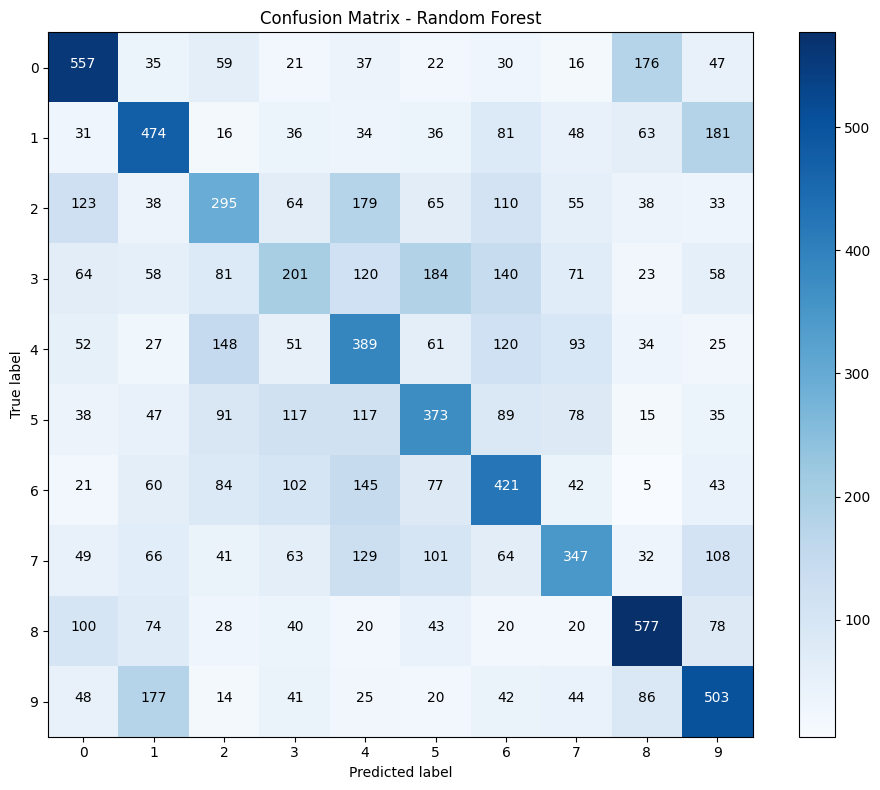

In [19]:

# Buat confusion matrix
cm = confusion_matrix(y_test_flatten, rf_predictions)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
tick_marks = range(len(set(y_test_flatten)))  # Jumlah kelas
plt.xticks(tick_marks, range(len(set(y_test_flatten))))
plt.yticks(tick_marks, range(len(set(y_test_flatten))))

# Tambahkan label
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [14]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_split, y_train_split)

# Make predictions
dt_predictions = dt_model.predict(x_test_normalized)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test_flatten, dt_predictions))

# Calculate and print accuracy
dt_accuracy = accuracy_score(y_test_flatten, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.32      0.31      1000
           1       0.23      0.21      0.22      1000
           2       0.18      0.20      0.19      1000
           3       0.14      0.14      0.14      1000
           4       0.17      0.20      0.18      1000
           5       0.17      0.17      0.17      1000
           6       0.19      0.18      0.18      1000
           7       0.18      0.18      0.18      1000
           8       0.34      0.33      0.33      1000
           9       0.25      0.22      0.23      1000

    accuracy                           0.21     10000
   macro avg       0.22      0.21      0.22     10000
weighted avg       0.22      0.21      0.22     10000

Decision Tree Accuracy: 21.47%


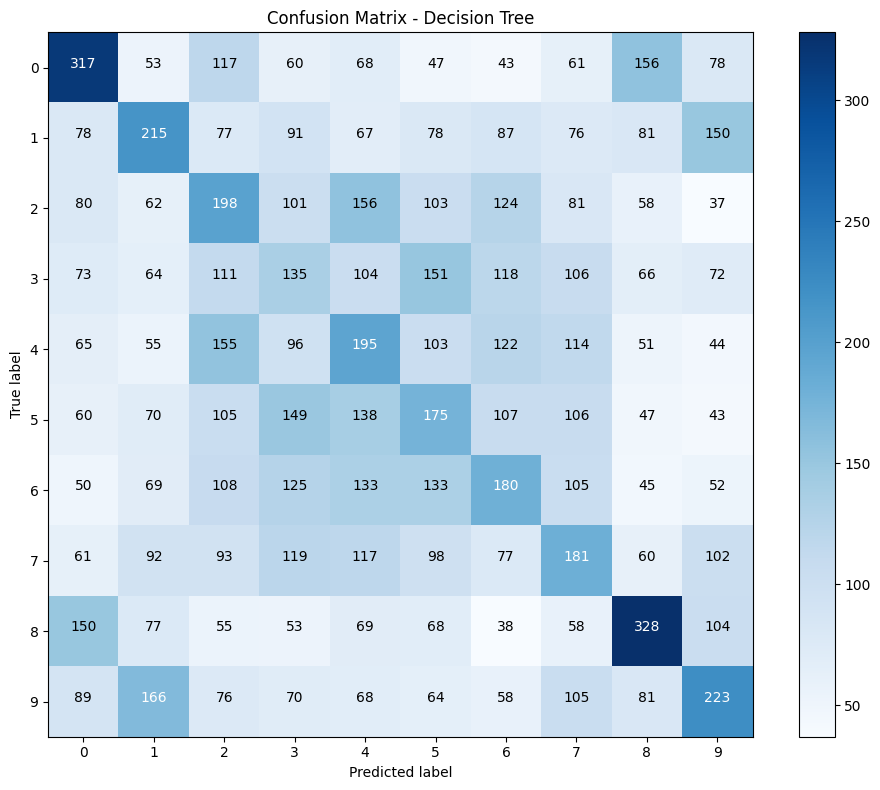

In [20]:
# Buat confusion matrix
dt_cm = confusion_matrix(y_test_flatten, dt_predictions)  

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(dt_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.colorbar()
tick_marks = range(len(set(y_test_flatten)))  # Jumlah kelas
plt.xticks(tick_marks, range(len(set(y_test_flatten))))
plt.yticks(tick_marks, range(len(set(y_test_flatten))))

# Tambahkan label
thresh = dt_cm.max() / 2.
for i, j in np.ndindex(dt_cm.shape):
    plt.text(j, i, format(dt_cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if dt_cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()